In [1]:
import glob
from zipfile import ZipFile
import zipfile
import pandas as pd
#from time import time

import os 

In [16]:
#pwd

In [17]:
#ls

In [4]:
os.chdir('Data')

In [5]:
ls

dly1823.zip  info.txt


In [6]:
zf = ZipFile("dly1823.zip")  
zf.namelist() # gives names of the files within teh zipped folder

['dly1823.csv', 'KeyDly.txt', 'Data_Licence.pdf', 'Data_Licence.txt']

### before using the data - this data is downloaded from www.met.ie ###


•	Copyright Met Éireann
•	Source www.met.ie
•	This data is published under a Creative Commons Attribution 4.0 International (CC BY 4.0). https://creativecommons.org/licenses/by/4.0/
•	Met Éireann does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or damage arising from their use.

In [7]:
df = pd.read_csv(zf.open("dly1823.csv"), skiprows=13)

In [8]:
df.head()

,date,ind,rain,ind.1,maxt,ind.2,mint,gmin,soil
0,01-jan-1941,0,2.4,,,,,,
1,02-jan-1941,0,0.9,,,,,,
2,03-jan-1941,0,0.0,,,,,,
3,04-jan-1941,0,0.0,,,,,,
4,05-jan-1941,0,0.0,,,,,,


In [9]:
df.columns
req_col = ['date', 'rain', 'maxt', 'mint']
df = df[req_col]



In [10]:
df['date1'] = pd.to_datetime(df['date'],format='%d-%b-%Y')


df['maxt'] = df['maxt'].str.strip() 
df['mint'] = df['mint'].str.strip()

df['maxt'] = pd.to_numeric(df['maxt'])
df['mint'] = pd.to_numeric(df['mint'])


df_cleaned = df.dropna(subset=['maxt', 'mint'])

In [11]:
df = df_cleaned.copy()

In [13]:
!pip install matplotlib==3.10.0 # install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 13.3 MB/s eta 0:00:00a 0:00:01


In [14]:
import matplotlib.pyplot as plt

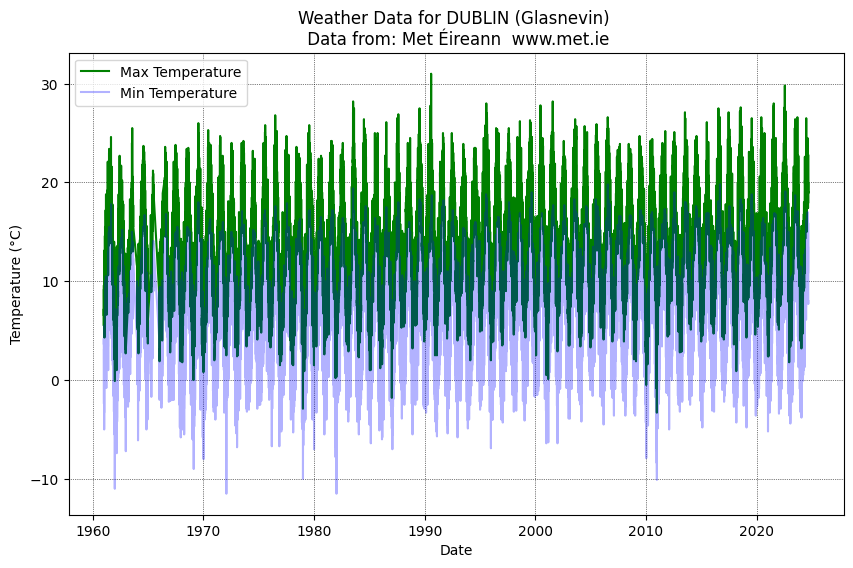

In [15]:
plt.style.use('default')
# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(df['date1'], df['rain'], label='Rain')
plt.plot(df['date1'], df['maxt'], label='Max Temperature', color='green')
plt.plot(df['date1'], df['mint'], label='Min Temperature',color='blue', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Weather Data for DUBLIN (Glasnevin) \n Data from: Met Éireann  www.met.ie')
plt.legend()
plt.grid(True, which='both', linestyle=':', color='black', linewidth=0.5)
plt.show()